# Proyecto 6

## Análisis de los datos

Se agregan los datos y se hace una exploración del contenido para determinar si el nombre de las columnas y los tipo de datos son correctos. También si existen valores ausentes o nulos y filas duplicadas.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Read DataFrame
df = pd.read_csv('./games.csv',sep = ',', header=0)

Se procede a hacer un análisis exploratorio del DataFrame.

In [3]:
# Show DataFrame
print(df.head(3))

                Name Platform  Year_of_Release     Genre  NA_sales  EU_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.58   
2     Mario Kart Wii      Wii           2008.0    Racing     15.68     12.76   

   JP_sales  Other_sales  Critic_Score User_Score Rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN  
2      3.79         3.29          82.0        8.3      E  


In [4]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se tiene valores nulos en casi todas las columnas y el tipo de dato de algunas columnas no es adecuado.

In [5]:
# Verify the number of null values per column
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Fill null values by 'Unknown' in column 'Name'
df['Name'] = df['Name'].fillna('Unknown')
df['Name'].isna().sum()

0

## Preparación de los datos

**Nombre de las columnas y contenido de la columna 'Name'**

Primero se cambiará el nombre de las columnas a "snake_case" y después el contenido usando la función creada 'strip_lower_replace'.

In [7]:
def strip_lower_replace(element):
    '''Function to format data'''
    element = element.strip().lower().replace(" ","_").replace(",","")
    element = element.replace(";","").replace(".","")
    return element

In [8]:
# Loop to change column names
col_names = []
for old_name in df.columns:
    new_name = strip_lower_replace(old_name)
    col_names.append(new_name)

df.columns = col_names

In [9]:
# Change column types
df[['name','platform','genre']] = df[['name','platform','genre']].astype('str')

In [10]:
# Change column names
df['name'] = df['name'].apply(strip_lower_replace)
df['platform'] = df['platform'].apply(strip_lower_replace)
df['genre'] = df['genre'].apply(strip_lower_replace)

In [11]:
# Show DatFrame
df.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9799,the_lord_of_the_rings:_aragorn's_quest,psp,2010.0,action,0.07,0.02,0.00,0.02,NaN,tbd,E10+
12011,mcfarlane's_evil_prophecy,ps2,NaN,action,0.03,0.03,0.00,0.01,34.0,3.2,M
1113,need_for_speed_carbon,x360,2006.0,racing,0.76,0.69,0.02,0.18,77.0,6.3,E10+


**Columna 'platform'**

Al examinar la columna 'platform', se observa que se puede agrupar o categorizar por empresa. Entonces se creará una nueva columna llamada 'platform_group' usando la función creada 'group_plat'.

In [12]:
# Show unique values of column 'platform'
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [13]:
def group_plat(category):
    '''Function to categorize 'platform' column content'''
    if category in ['3ds','ds','gb','gba','gc','n64','nes','snes','wii','wiiu']:
        return "Nintendo"
    if category in ['pc','pcfx']:
        return "PC"
    if category in ['ps','ps2','ps3','ps4','psp','psv']:
        return "PlayStation"
    if category in ['x360','xb','xone']:
        return "XBox"
    else:
        return "Other"

In [14]:
# Create a new column of categories of platforms
df['platform_group'] = df['platform'].apply(group_plat)
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
14367,sekai_no_hate_made_itte_q!_chinjuu_hunter_mono...,ds,2010.0,misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN,Nintendo
12850,jikkyou_powerful_pro_yakyuu_dreamcast_edition,dc,2000.0,sports,0.00,0.00,0.06,0.00,NaN,NaN,NaN,Other
2,mario_kart_wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo
32,call_of_duty:_black_ops,x360,2010.0,shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,XBox
7201,mega_man_64,n64,2000.0,action,0.14,0.03,0.05,0.00,NaN,NaN,NaN,Nintendo


**Columna 'genre'**

La columna 'genre' ya no tiene valores nulos.

In [15]:
# Verify the number of null values of column 'genre'
df['genre'].isna().sum()

0

Se verificá si la columna 'genre' tiene un elemento de tipo diferente a string.

In [16]:
# Show number of different genres in column 'genre'
df['genre'].value_counts()

genre
action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
nan                2
Name: count, dtype: int64

El método value_counts() generó el resultado esperado, por lo tanto, se puede asumir que todos los datos en la columna 'genre' son string, pero hay valores 'nan'.

In [17]:
# Show unique values of column 'genre'
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', 'nan'], dtype=object)

In [18]:
# Fill string 'nan' by 'other' in column 'genre'
df.loc[df['genre'] == 'nan', 'genre'] = 'other'
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', 'other'], dtype=object)

Todo bien en la columna 'genre'.

**Columna 'critic_score'**

Se verificá si todos los valores son de tipo float, sin importar si tiene valores nulos.

In [19]:
# Show some metrics of column 'critic_score'
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

El método 'describe' pudo generar las métricas correspondientes, lo que implica que los datos de la columna 'critic_score' tienen el tipo adecuado (float64).

**Columna 'user_score'**

Al usar el método 'describe' para la columna 'user_score', se observa que no genera métricas como 'mean' o 'std', lo que implica que hay strings en esa columna.

In [20]:
# Show some metrics of column 'user_score'
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [21]:
# Show unique values of column 'user_score'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Se reemplazarán los valores 'tbd' por nan y se cambiará el formato a 'float'.

In [22]:
# Change the 'tbd' values by 'nan', in column 'user_score'
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [23]:
# Change the type of column 'user_score'
df['user_score'] = df['user_score'].astype('float')

**Columna rating**

Parala columna 'ratings', previamente se mostró que tiene valores ausentes, por ahora no es necesario agrupar o modificar nada.

In [24]:
# Verify if all data in column 'rating' is string by using value_counts() method
df['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

El método value_counts() generó el resultado esperado, por lo tanto, se puede asumir que todos los datos en la columna 'rating' son string.

Hasta este momento no se puede determinar cómo reemplazar los valores ausentes en algunas columnas. Este análisis se hará más adelante cuando se realice el análsis de dispersión de los datos para determinar si los valores ausentes se reemplazán por la mediana, el promedio o se eliminan. Puede ser que exiten valores ausentes para juegos muy viejos donde no se tomó 'critic_score' ni 'user_score'.

A continuación se eliminarán filas duplicadas, considerando sólo el contenido de las columnas "name", "platform_group" y "year_of_release", dado que si un juego tiene el mismo nombre, plataforma y año de lanzamineto, se asume que el es mismo y está duplicado.

In [25]:
# Show duplicates considering a few columns only
df[["name","platform_group","year_of_release"]].duplicated().sum()

1427

Eliminando duplicados.

In [26]:
# Delete duplicated rows considering a few columns only
df=df.drop_duplicates(subset=["name","platform_group","year_of_release"]).reset_index(drop=True)

Verificando cuantos duplicados existen.

In [27]:
# Show duplicates considering a few columns only
df[["name","platform_group","year_of_release"]].duplicated().sum()

0

Se creará una columna de ventas totales.

In [28]:
# Create a new column of total sales
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

## Análisis de los datos

A continuación se muestran las ventas totales por plataforma durante todos los años en orden ascendente de ventas totales.

In [29]:
# Group by 'platform' and obtain the total sales
sales_per_platform = df.groupby('platform')['total_sales'].sum()
sales_per_platform = sales_per_platform.sort_values()

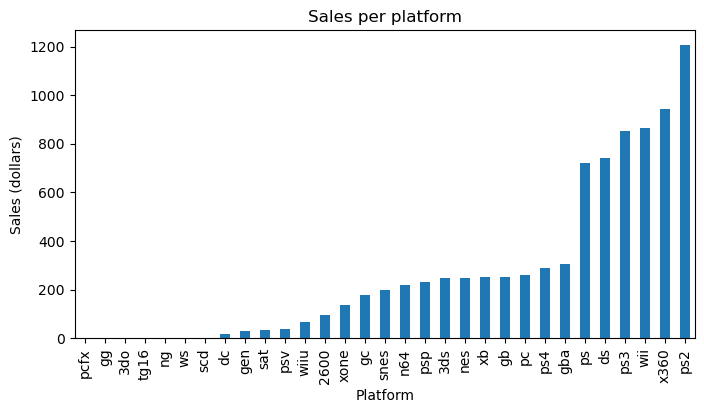

In [30]:
# Plot 'sales_per_platform' considering all platforms
sales_per_platform.plot(kind='bar', figsize=[8,4], title='Sales per platform',
                    xlabel='Platform', ylabel='Sales (dollars)')
plt.show()

**Conclusiones:** El juego mós vendido de todos los tiempos es el ps2, el cual pertenece a la empresa "PlayStation". Otros juegos que destacan son x360 ps3, wii y ds.

A continuación se muestran los juegos lanzados por año.

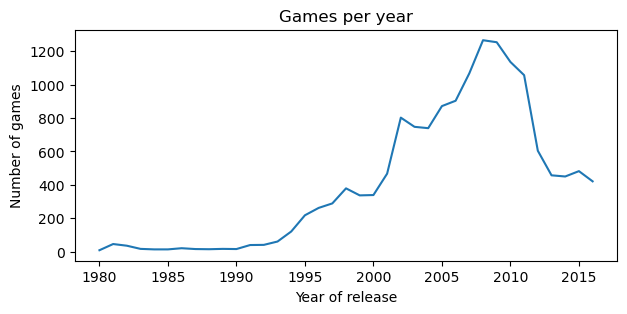

In [31]:
# Group by 'year_of_release' and count the number of games released each year
games_per_year = df.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='line', figsize=[7,3], title='Games per year',
                    xlabel='Year of release', ylabel='Number of games')
plt.show()

Se asume que la crisis de 2008 afectó gravemente las ventas de los juegos.

**Nota:** A partir del año 1995 las ventas se incrementaron considerablemnte, por tanto, se tomará ese año como referencia.

**Nota:** A partir de aquí y en lo sucesivo, el análisis de los datos considerará sólo el conjunto de categorias para las plataforma previamente definido (columna 'platform_group').

**Distribución en las ventas de juegos a partir de 1995**

In [32]:
# Filter by 'year_of_release' >= 1995
df = df[df['year_of_release'] >= 1995]

In [33]:
# Group by 'year_of_release' and 'platform_group' and obtain the total sales
sales_per_platform = df.pivot_table(
    index = 'year_of_release', columns = 'platform_group',
    values = 'total_sales', aggfunc = 'sum')
sales_per_platform.head(5)

platform_group,Nintendo,Other,PC,PlayStation,XBox
year_of_release,,,,,
1995.0,35.80,11.94,4.22,35.96,NaN
1996.0,86.05,7.73,10.61,94.70,NaN
1997.0,46.86,6.77,11.27,136.17,NaN
1998.0,76.36,7.20,3.26,169.49,NaN
1999.0,95.82,5.71,4.74,144.53,NaN


**Conclusiones:** XBox fue lanzado hasta el 2000 y que los que estan en la categoria 'Other' ya no son vendidos. Se observa que otros juegos (categoria 'Other') que eran populaes en 1996, en 2003 ya no lo son. Tardaron aproximadamente 7 años en dejar de ser populares. Para el caso de XBox tardo aproximadamente 7 años en ser popular (de 2000 a 2007).

A continuación se muestra la distribución de las ventas totales por plataforma.

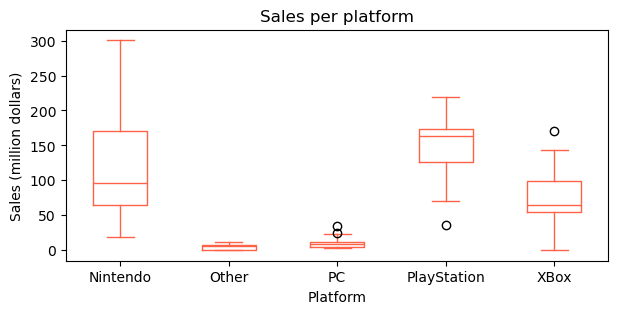

In [34]:
# Plot 'sales_per_platform' considering main group of platforms
sales_per_platform.plot(kind='box', figsize=[7,3], title='Sales per platform',
                    xlabel='Platform', ylabel='Sales (million dollars)', color='tomato')
plt.show()

**Conclusiones:** PlayStation ha vendido más en general (promedio), además tiene menor dispersión en sus datos, lo que significa que no ha variado mucho en sus ventas a lo largo de los años. Tomando en cuanta la tabla de arriba, PlayStation y Nintendo vendieron 35 millones de juegos en 1995, pero en 1999 PlayStation vendio 144.53 millones mientras que Nintendo solo 95.82 millones, en sólo 4 años PlayStation ha superado en ventas a Nintendo. Por otro lado, Nintendo en general ha vendido un poco más que XBox, pero con una variación considerable en sus ventas durante los años.

Antes de continuar se analizarán las columnas 'critic_score' y 'user_score'. A continación se muestran unas métricas utiles.

In [35]:
# Show some metrics of columns 'critic_score' and 'user_score'
df[['critic_score','user_score']].describe()

,critic_score,user_score
count,7311.000000,6718.000000
mean,69.184653,7.185844
std,14.058811,1.476684
min,13.000000,0.000000
25%,60.000000,6.500000
50%,71.000000,7.500000
75%,80.000000,8.200000
max,98.000000,9.700000


In [36]:
# Median of columns 'critic_score' and 'user_score'
df[['critic_score','user_score']].median()

critic_score    71.0
user_score       7.5
dtype: float64

Para ambas columnas las medias son casi iguales a las medianas, lo que significa que no existen valores atípicos considerables en ambas columnas, por lo tanto, los valores ausentes en ambas columnas se llenarán con las medias.

In [37]:
# Fill nan values of columns 'critic_score' and 'user_score'
cols = ['critic_score','user_score']
for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [38]:
# Verify non-null values in all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14543 entries, 0 to 15287
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14543 non-null  object 
 1   platform         14543 non-null  object 
 2   year_of_release  14543 non-null  float64
 3   genre            14543 non-null  object 
 4   na_sales         14543 non-null  float64
 5   eu_sales         14543 non-null  float64
 6   jp_sales         14543 non-null  float64
 7   other_sales      14543 non-null  float64
 8   critic_score     14543 non-null  float64
 9   user_score       14543 non-null  float64
 10  rating           8675 non-null   object 
 11  platform_group   14543 non-null  object 
 12  total_sales      14543 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.6+ MB


Los gráficos de disperción ('scatter plots') para PlayStation considerando 'critic_score' and 'user_score' se muestran a continuación.

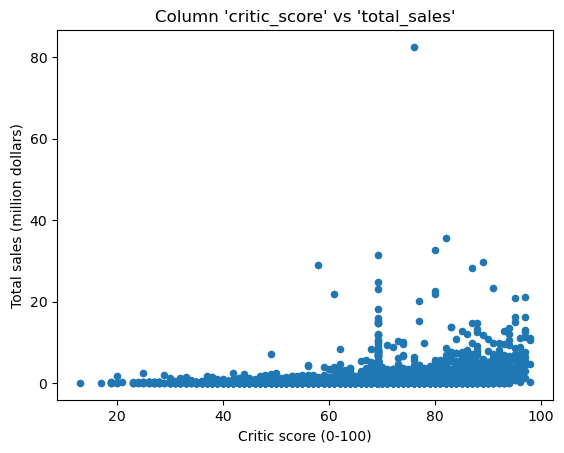

In [39]:
# Scatter plot
df.sort_values('critic_score').plot(kind = 'scatter',
            x = 'critic_score', y = 'total_sales',
            title = "Column 'critic_score' vs 'total_sales'",
            xlabel = 'Critic score (0-100)', ylabel = 'Total sales (million dollars)')
plt.show()

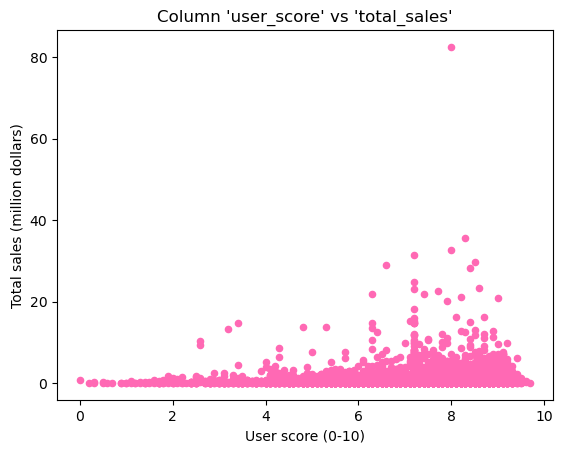

In [40]:
# Scatter plot
df.sort_values('user_score').plot(kind = 'scatter',
            x = 'user_score', y = 'total_sales',
            title = "Column 'user_score' vs 'total_sales'", color = 'hotpink',
            xlabel = 'User score (0-10)', ylabel = 'Total sales (million dollars)')
plt.show()

In [41]:
# Correlation between 'critic_score' and 'user_score' with 'total_sales'
print(df['critic_score'].corr(df['total_sales']))
print(df['user_score'].corr(df['total_sales']))

0.21722375784390666
0.07855370700070095


**Conclusiones:**  La correlación lineal entre la crítica profesional y las ventas totales es baja (del 21%), y la correlación lineal entre la crítica de los usuarios y las ventas totales es mucho más baja (del 7.8%). No importa que la columna 'user_score' no este multiplicada por 10, el coeficiente de correlación lineal sera el mismo (7.8%).

Finalmene, se analizará la distribución general de las ventas de los juegos por género y por plataforma.

In [42]:
# Group by 'platform_group' column 'genre' and obtain the total sales
sales_per_genre = df.pivot_table(
    index = 'platform_group', columns = 'genre',
    values = 'total_sales', aggfunc = 'sum')

sales_per_genre

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
platform_group,,,,,,,,,,,,
Nintendo,349.19,84.56,89.31,432.93,374.86,127.90,190.01,405.78,75.36,209.60,387.23,54.33
Other,1.91,6.80,9.10,1.20,3.20,1.00,4.25,5.66,3.81,1.31,6.04,3.44
PC,30.71,6.42,0.13,6.00,0.46,0.91,3.78,47.28,38.32,50.30,11.97,43.54
PlayStation,811.23,82.51,229.46,193.74,186.52,23.87,359.13,326.09,426.16,82.68,527.61,51.34
XBox,309.18,19.49,52.01,103.31,21.44,1.14,101.82,94.92,380.37,21.29,197.74,12.65


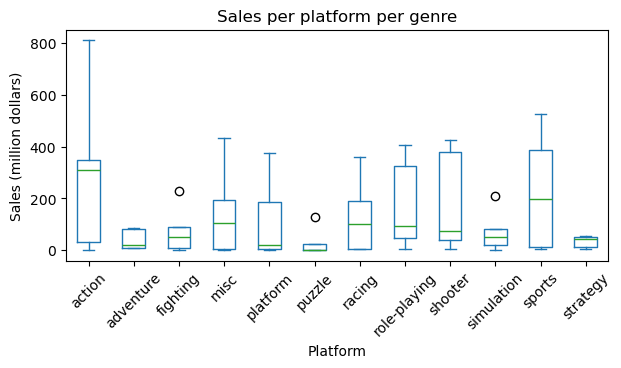

In [43]:
# Plot 'sales_per_platform' considering genre and group of platforms
sales_per_genre.plot(kind='box', figsize=[7,3], title='Sales per platform per genre',
    xlabel='Platform', ylabel='Sales (million dollars)', rot = 45)
plt.show()

**Conluciones:** Definitivamente la categoria 'action' es la más vendida aunque la variación en sus ventas sea relativamente alta.

## Perfil de usuario por regiones

A continuación se crearán 3 grupos de las 5 plataformas más vendidas en NA, EU y JP.

In [44]:
# Group by 'platform' and obtain total sales in each region
regions = df.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()

In [45]:
# Most popular platforms in NA
region_na = regions['na_sales'].sort_values(ascending=False).reset_index()

# Most popular platforms in EU
region_eu = regions['eu_sales'].sort_values(ascending=False).reset_index()

# Most popular platforms in JP
region_jp = regions['jp_sales'].sort_values(ascending=False).reset_index()

En la tabla de abajo se muestran las 5 plataformas más vendidas por región, además se muestran las ventas individuales por plataforma.

In [46]:
# Concatenate the three DataFrames
region_na_eu_jp = pd.concat([region_na,region_eu,region_jp],axis='columns')
region_na_eu_jp = region_na_eu_jp.loc[0:4]
region_na_eu_jp

,platform,na_sales,platform,eu_sales,platform,jp_sales
0,x360,578.65,ps2,326.55,ds,174.68
1,ps2,549.53,ps3,295.74,ps,137.07
2,wii,460.01,x360,261.00,ps2,136.46
3,ps3,356.18,wii,248.70,3ds,100.44
4,ds,336.17,ps,207.99,psp,72.31


A continuación se muestra la distribución de las ventas de las 5 plataformas más vendidas por región.

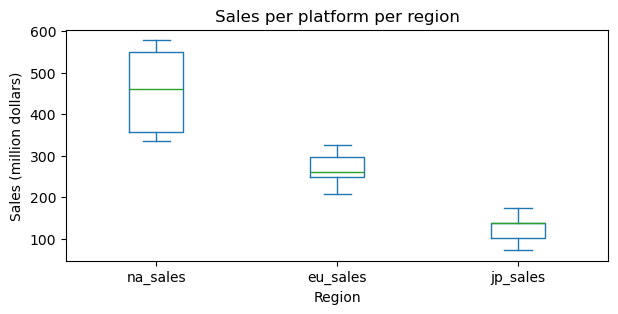

In [47]:
# Box plot
region_na_eu_jp.plot(kind='box', figsize=[7,3], title='Sales per platform per region',
    xlabel='Region', ylabel='Sales (million dollars)')
plt.show()

**Conclusiones:** Las ventas en NA son mucho mayores a las ventas en Eu y JP, aunque se tenga una variacion grande en dichas ventas.

Para los géneros, se hará el mismo análisis de ventas usado para las plataformas. Entonces se crearán 3 grupos de los 5 géneros más vendidos en NA, EU y JP.

In [48]:
# Group by 'genre' and obtain total sales in each region
regions_genre = df.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()

In [49]:
# Most popular genre in NA
genres_na = regions_genre['na_sales'].sort_values(ascending=False).reset_index()

# Most popular genres in EU
genres_eu = regions_genre['eu_sales'].sort_values(ascending=False).reset_index()

# Most popular genres in JP
genres_jp = regions_genre['jp_sales'].sort_values(ascending=False).reset_index()

En la tabla de abajo se muestran los 5 géneros más vendidas por región, además se muestran las ventas individuales por género.

In [50]:
# Concatenate the three DataFrames
genres_na_eu_jp = pd.concat([genres_na,genres_eu,genres_jp],axis='columns')
genres_na_eu_jp = genres_na_eu_jp.loc[0:4]
genres_na_eu_jp

,genre,na_sales,genre,eu_sales,genre,jp_sales
0,action,738.91,action,460.78,role-playing,312.01
1,sports,590.23,sports,330.42,action,138.94
2,shooter,504.18,shooter,294.30,misc,98.07
3,misc,371.49,racing,220.56,sports,97.63
4,racing,324.68,misc,199.94,platform,76.87


**Conclusiones:** El género más vendido en NA y EU es 'action', mientras que el más vendido en JP es 'role-playing'.

Al analizar las ventas por región considerando plataforma y género, se tiene lo siguiente. Las métricas por platforma son:

In [51]:
# Show DataFrame descriptive statistics
region_na_eu_jp.describe()

,na_sales,eu_sales,jp_sales
count,5.000000,5.000000,5.000000
mean,456.108000,267.996000,124.192000
std,109.692942,45.332935,39.119318
min,336.170000,207.990000,72.310000
25%,356.180000,248.700000,100.440000
50%,460.010000,261.000000,136.460000
75%,549.530000,295.740000,137.070000
max,578.650000,326.550000,174.680000


Las métricas por género son:

In [52]:
# Show DataFrame descriptive statistics
genres_na_eu_jp.describe()

,na_sales,eu_sales,jp_sales
count,5.000000,5.000000,5.000000
mean,505.898000,301.200000,144.704000
std,167.567079,103.831103,96.198576
min,324.680000,199.940000,76.870000
25%,371.490000,220.560000,97.630000
50%,504.180000,294.300000,98.070000
75%,590.230000,330.420000,138.940000
max,738.910000,460.780000,312.010000


**Conclusiones:** Se analizará la región NA, el análisis para las otras 2 regiones es similar. El promedio de ventas en NA por plataforma es de 456.108 con std de 109.692, mientras que las ventas promedio por género son de 505.898 con std de 167.567. Nótese que hay diferencia si se agrupa por plataforma en vez de por genreo.

Finalmente, para determinar si las clasificaciones de ESRB afectan a las ventas en general, se agrupará por 'rating' y por 'year_of_release' y se obtendran las ventas totales respecto al rating y al tiempo.

In [53]:
# Group by 'rating' and obtain the total sales in each platform group
sales_per_rating = df.pivot_table(
    index = 'rating', columns = 'platform_group',
    values = 'total_sales', aggfunc = 'sum')

sales_per_rating.describe()

platform_group,Nintendo,Other,PC,PlayStation,XBox
count,5.000000,3.000000,7.000000,6.000000,5.000000
mean,355.496000,1.516667,28.942857,399.935000,242.058000
std,517.625631,1.562509,38.179810,383.960981,210.688927
min,1.420000,0.050000,0.040000,0.240000,1.960000
25%,32.230000,0.695000,1.250000,42.545000,105.790000
50%,215.910000,1.340000,10.150000,421.740000,263.420000
75%,269.640000,2.250000,50.435000,733.660000,281.950000
max,1258.280000,3.160000,89.040000,802.110000,557.170000


In [54]:
# Group by 'year_of_release' column 'platform_group' and obtain the total sales
sales_per_platform = df.pivot_table(
    index = 'year_of_release', columns = 'platform_group',
    values = 'total_sales', aggfunc = 'sum')

sales_per_platform.describe()

platform_group,Nintendo,Other,PC,PlayStation,XBox
count,22.000000,10.000000,22.000000,22.000000,17.000000
mean,126.411818,4.772000,10.900909,150.015455,77.374118
std,87.932688,4.099745,7.947798,44.760665,45.870752
min,19.140000,0.020000,2.850000,35.960000,0.990000
25%,64.570000,0.555000,4.867500,126.597500,54.790000
50%,96.305000,6.190000,9.060000,163.480000,64.850000
75%,171.330000,7.092500,12.410000,173.915000,99.740000
max,300.540000,11.940000,35.030000,218.870000,170.030000


**Conclusiones:** Para la plataforma Nintendo, el promedio de ventas considerando el rating es de 355.49 con std de 517.625, mientras que las ventas promedio a lo largo de los años es de 126.411 con std de 87.932, entonces mean_Nintendo = 355.49/126.411 = **2.812** y std_Nintendo = 517.625/87.932 = **5.886**. Ahora, para la plataforma XBox, mean_XBox = 242.058/77.374 = **3.128** y std_XBox = 210.688/45.87 = **4.593**. Así sucesivamente con las otras plataformas, la proporción en las métricas se mantiene, por lo tanto, se concluye que el rating no afecta significativamente las ventas totales.

## Prueba de hipótesis

La prueba T se usa para determinar si los promedios de 2 muestras son iguales, independientemente si las muestras tienen distribución normal o no. En este análisis se usará la prueba de Levene para complementar la prueba T y se usará un umbral de significación alpha = 5% para ambas pruebas.

In [55]:
# Umbral alpha for the T-test
alpha = 0.05

In [56]:
# Extract samples
sample_xone = df.loc[df['platform'] == 'xone', 'user_score']
sample_pc = df.loc[df['platform'] == 'pc', 'user_score']

**Hipótesis 1:** Las calificaciones promedio de los usuarios (User_score) para las plataformas Xbox One y PC son las mismas.

Hipótesis nula (H0): User_score promedio de Xbox One = User_score promedio de PC

Hipótesis alternativa (H1): User_score promedio de Xbox One != User_score promedio de PC

In [57]:
# Verify equal variances (Levene test)
levene = st.levene(sample_xone, sample_pc)
print("Levene test p-value:", levene.pvalue)
print("Variances are different" if levene.pvalue < alpha else "Variances are the same")

# Show samples variances (optional)
print(f"Sample_xone variance: {np.var(sample_xone):.3f}")
print(f"Sample_pc variance: {np.var(sample_pc):.3f}")

Levene test p-value: 0.15228571260967888
Variances are the same
Sample_xone variance: 1.531
Sample_pc variance: 1.850


In [58]:
# T-test, variances are the same, then 'equal_var=True'
prove1 = st.ttest_ind(sample_xone, sample_pc, alternative = 'two-sided',equal_var=True)
print("T-test p-value:", prove1.pvalue)

# Conclusion of T-test
print("H0 is rejected" if prove1.pvalue < alpha else "H0 cannot be rejected")

T-test p-value: 0.0006630549118666682
H0 is rejected


**Conclusión:** La hipótesis nula 1 es rechazada.

**Hipótesis 2:** Las calificaciones promedio de los usuarios (User_score) para los géneros de Acción y Deportes son diferentes. Se hará el mismo procedimiento mostrado anteriormente.

Por convención, H0 debe expresar igualdad, entonces al final de la prueba se invertirá el resultado.

Hipótesis nula (H0): User_score promedio de action = User_score promedio de sports

Hipótesis alternativa (H1): User_score promedio de action != User_score promedio de sports

In [59]:
# Extract samples
sample_action = df.loc[df['genre'] == 'action', 'user_score']
sample_sports = df.loc[df['genre'] == 'sports', 'user_score']

In [60]:
# Verify equal variances (Levene test)
levene2 = st.levene(sample_action, sample_sports)
print("Levene test p-value:", levene2.pvalue)
print("Variances are different" if levene2.pvalue < alpha else "Variances are the same")

# Show samples variances (optional)
print(f"Sample_action variance: {np.var(sample_action):.3f}")
print(f"Sample_sports variance: {np.var(sample_sports):.3f}")

Levene test p-value: 0.24440777038011688
Variances are the same
Sample_action variance: 1.102
Sample_sports variance: 1.120


In [61]:
# T-test 2, variances are the same, then 'equal_var=True'
prove2 = st.ttest_ind(sample_action, sample_sports,alternative='two-sided',equal_var=True)
print("T-test p-value:", prove2.pvalue)

# Conclusion of T-test
print("H0 is rejected" if prove2.pvalue < alpha else "H0 cannot be rejected")

T-test p-value: 0.6405444830931064
H0 cannot be rejected


**Conclusión:** H0 (User_score promedio de action = User_score promedio de sports) no es rechazada, entonces la hipótesis 2 (las calificaciones promedio de los usuarios (User_score) para los géneros de Acción y Deportes son diferentes), es rechazada.

## Conclusiones generales

Del análisis mostrado anteriormente se concluye que el juego más vendido de todos los tiempos es el "ps2" de la empresa “PlayStation”, la cual va en ascenso en sus ventas. Se concluye también que un juego tarda aproximadamente 7 años en volverse o dejar de ser popular. Finlmente, se mostró que el ni las reseñas profesionales ni las reseñas de los usuarios ni la región de venta afectan significativamente las ventas de los juegos de acción de las diferentes plataformas.